# TIME-SERIES ANALYSIS ON AIRPASSENGER DATASET

In [96]:
import pandas as pd
A=pd.read_csv("C:/Users/Neha/Downloads/PythonNotes/AirPassengers.csv")

In [97]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [98]:
A.shape

(144, 2)

In [99]:
A=A.rename(columns={'#Passengers':'Passengers','Month':'Year'})

In [100]:
A.head()

,Year,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [101]:
#to convert into correct data format
A.year=pd.to_datetime(A.Year,format="%Y-%m")

<ipython-input-101-3dcd6d9770ff>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  A.year=pd.to_datetime(A.Year,format="%Y-%m")


In [102]:
A.index=A.year#time should not be a specific column,it should be an index

In [103]:
A.head()

,Year,Passengers
Year,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [104]:
A=A.drop(labels=['Year'],axis=1)

In [105]:
A.head()

,Passengers
Year,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Visualise Original Time-Series

Text(0, 0.5, 'No. of Passengers')

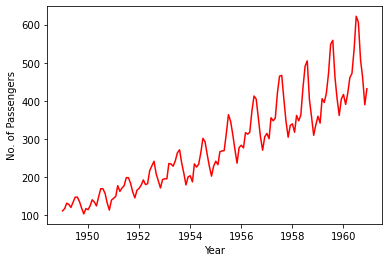

In [106]:
import matplotlib.pyplot as plt
#Visualise the airpassenger dataset
plt.plot(A,c='red')
plt.xlabel('Year')
plt.ylabel('No. of Passengers')

Air passengers data from 1949 to 1961 show significant upward growth of passengers.

# To visualise the components of time-series

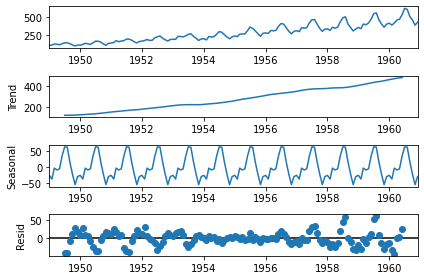

In [107]:
from statsmodels.api import tsa
tsa.seasonal_decompose(A).plot()
plt.show()

# Convert Non Stationary time series into Stationary time series


In [108]:
#using Log
import numpy as np
LOGGED_DF=pd.DataFrame(np.log(A['Passengers']))


In [109]:
# To check whether data has been converted to stationary using log
from statsmodels.tsa.stattools import adfuller
adfuller(LOGGED_DF['Passengers'])[1]

0.4223667747703857

In [110]:
#using 10^-n
Pass=pd.DataFrame(A['Passengers']*0.0001)

In [111]:
# To check whether data has been converted to stationary using 10^-n
from statsmodels.tsa.stattools import adfuller
adfuller(Pass['Passengers'])[1]

0.9918802434376398

In [112]:
#Using Standardisation(z-score)
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
STD=pd.DataFrame(ss.fit_transform(A[['Passengers']]),columns=['Passengers'],index=A.index)

In [113]:
STD

,Passengers
Year,
1949-01-01,-1.407779
1949-02-01,-1.357590
1949-03-01,-1.240483
1949-04-01,-1.265578
1949-05-01,-1.332496
...,...
1960-08-01,2.724417
1960-09-01,1.904669
1960-10-01,1.511525


In [114]:
# To check whether data has been converted to stationary using 10^-n
from statsmodels.tsa.stattools import adfuller
adfuller(STD['Passengers'])[1]

0.9918802434376411

In [115]:
rm=np.log(A['Passengers']).rolling(window=12).mean()
B=pd.DataFrame(np.log(A['Passengers'])-rm).dropna()

In [116]:
B

,Passengers
Year,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [117]:
from statsmodels.tsa.stattools import adfuller
adfuller(B['Passengers'])[1]

0.022234630001243844

<AxesSubplot:xlabel='Year'>

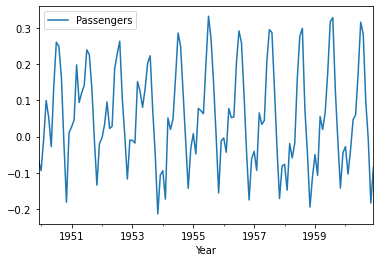

In [118]:
B.plot()

In [119]:
trd=B[B.index.year<=1958]
tsd=B[B.index.year>1958]

In [120]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()
pred = model.predict(start="1959-01-01",end="1960-12-01")
tsd['Forecasted_from_AR']=pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarning)
C:\

In [121]:
tsd

,Passengers,Forecasted_from_AR
Year,,
1959-01-01,-0.049241,-0.063446
1959-02-01,-0.106598,-0.142865
1959-03-01,0.055385,-0.054353
1959-04-01,0.019679,-0.080923
1959-05-01,0.066365,0.000782
1959-06-01,0.176286,0.147897
1959-07-01,0.316430,0.266176
1959-08-01,0.327838,0.276603
1959-09-01,0.128057,0.111256


In [125]:
from sklearn.metrics import mean_absolute_error
print("MAE = %.2f"%mean_absolute_error(tsd.Passengers,tsd.Forecasted_from_AR))

MAE = 0.05


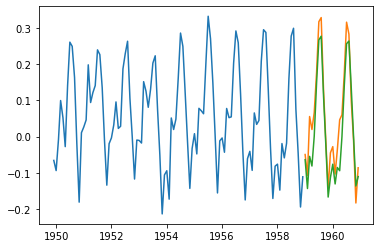

In [130]:
plt.plot(trd)
plt.plot(tsd)